### Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imutils import paths
import random
import time
from datetime import datetime


For **pre-processing** and **classification**

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
import os
from skillsnetwork import cvstudio

In [4]:
cvStudioClient = cvstudio.CVStudio()
annotations = cvStudioClient.get_annotations()

In [5]:
print(annotations)

{'version': '1.0', 'type': 'classification', 'labels': ['dog', 'cat'], 'annotations': {'4aa8943a-cc86-4834-9ae2-18b0a9de37a1.jpg': [{'label': 'cat'}], '364cc69c-fa26-4679-91d4-f401cb80c4d4.jpg': [{'label': 'dog'}], 'd00fda47-854b-4cbe-bb86-932109a99071.jpg': [{'label': 'dog'}], 'b65bb9a8-d5ab-4d7b-aa75-b5527900035e.jpg': [{'label': 'dog'}], 'a0ffff32-8c7b-4307-8235-eb50f5d7fb5d.jpg': [{'label': 'cat'}], '4f0e388d-4f8b-4a6d-ae17-b993d596db9e.jpg': [{'label': 'dog'}], '94f2c1ab-e3a7-4dc6-ac2d-edc9378f1017.jpg': [{'label': 'cat'}], '88c62c24-5230-4ece-a7d8-19c85e2be8e0.jpg': [{'label': 'cat'}], '3028db22-b354-4964-bcb6-50e60eb27598.jpg': [{'label': 'cat'}], 'e5726f08-5cf1-4a75-8cc0-950d9532b035.jpg': [{'label': 'cat'}], 'c90bf3f0-933d-4181-a03e-5ce8db646327.jpg': [{'label': 'cat'}], '722c329b-0999-4e0f-a13a-e0190b91db76.jpg': [{'label': 'cat'}], 'd4d57d9a-e03b-4b32-8cd3-ab9eefd0f3a6.jpg': [{'label': 'cat'}], '5fc59a62-5a3e-4515-a5a9-152b5288d5b6.jpg': [{'label': 'dog'}], '57e24396-6fda-4e

In [6]:
print(annotations['annotations'])

{'4aa8943a-cc86-4834-9ae2-18b0a9de37a1.jpg': [{'label': 'cat'}], '364cc69c-fa26-4679-91d4-f401cb80c4d4.jpg': [{'label': 'dog'}], 'd00fda47-854b-4cbe-bb86-932109a99071.jpg': [{'label': 'dog'}], 'b65bb9a8-d5ab-4d7b-aa75-b5527900035e.jpg': [{'label': 'dog'}], 'a0ffff32-8c7b-4307-8235-eb50f5d7fb5d.jpg': [{'label': 'cat'}], '4f0e388d-4f8b-4a6d-ae17-b993d596db9e.jpg': [{'label': 'dog'}], '94f2c1ab-e3a7-4dc6-ac2d-edc9378f1017.jpg': [{'label': 'cat'}], '88c62c24-5230-4ece-a7d8-19c85e2be8e0.jpg': [{'label': 'cat'}], '3028db22-b354-4964-bcb6-50e60eb27598.jpg': [{'label': 'cat'}], 'e5726f08-5cf1-4a75-8cc0-950d9532b035.jpg': [{'label': 'cat'}], 'c90bf3f0-933d-4181-a03e-5ce8db646327.jpg': [{'label': 'cat'}], '722c329b-0999-4e0f-a13a-e0190b91db76.jpg': [{'label': 'cat'}], 'd4d57d9a-e03b-4b32-8cd3-ab9eefd0f3a6.jpg': [{'label': 'cat'}], '5fc59a62-5a3e-4515-a5a9-152b5288d5b6.jpg': [{'label': 'dog'}], '57e24396-6fda-4eac-9a14-a7adeb0f92d0.jpg': [{'label': 'dog'}], 'f7b28947-f25b-46e0-9e31-0b7486af702d.j

In [7]:
path_ = annotations['annotations'].keys()
print(path_)

dict_keys(['4aa8943a-cc86-4834-9ae2-18b0a9de37a1.jpg', '364cc69c-fa26-4679-91d4-f401cb80c4d4.jpg', 'd00fda47-854b-4cbe-bb86-932109a99071.jpg', 'b65bb9a8-d5ab-4d7b-aa75-b5527900035e.jpg', 'a0ffff32-8c7b-4307-8235-eb50f5d7fb5d.jpg', '4f0e388d-4f8b-4a6d-ae17-b993d596db9e.jpg', '94f2c1ab-e3a7-4dc6-ac2d-edc9378f1017.jpg', '88c62c24-5230-4ece-a7d8-19c85e2be8e0.jpg', '3028db22-b354-4964-bcb6-50e60eb27598.jpg', 'e5726f08-5cf1-4a75-8cc0-950d9532b035.jpg', 'c90bf3f0-933d-4181-a03e-5ce8db646327.jpg', '722c329b-0999-4e0f-a13a-e0190b91db76.jpg', 'd4d57d9a-e03b-4b32-8cd3-ab9eefd0f3a6.jpg', '5fc59a62-5a3e-4515-a5a9-152b5288d5b6.jpg', '57e24396-6fda-4eac-9a14-a7adeb0f92d0.jpg', 'f7b28947-f25b-46e0-9e31-0b7486af702d.jpg', 'e2be8154-9fec-4599-9417-754ac4663225.jpg', 'dea0102d-1c69-41e7-a502-0a486943ddcb.jpg', 'f30860b8-ae97-4fd3-a841-5a5ade0ac4d3.jpg', 'c34feed3-c9ec-4011-9c01-ba820de38533.jpg', '9c8cec47-e078-443d-bf66-c1da7064522e.jpg', 'fc28fbf4-c516-4680-9e26-2f5d5e5c1f59.jpg', 'ce78f5c5-bc3b-45e2-a

In [8]:
path_list_ = list(path_)
img_path = './images/' + random.choice(path_list_)
print(img_path)

./images/bc9fc718-c6b7-4383-a8ad-e55aa4f1499f.jpg


 The whole image shape (386, 499, 3), 
[0] shape: (499, 3)

Full image here:

[[[220  50  86]
  [227  57  93]
  [219  49  85]
  ...
  [206  16  42]
  [206  16  42]
  [206  16  42]]

 [[219  49  85]
  [224  54  90]
  [214  44  80]
  ...
  [208  18  44]
  [208  18  44]
  [208  18  44]]

 [[219  49  85]
  [221  51  87]
  [210  40  76]
  ...
  [208  18  44]
  [208  18  44]
  [208  18  44]]

 ...

 [[199  15  49]
  [202  17  51]
  [208  23  57]
  ...
  [212  21  54]
  [212  21  54]
  [212  21  54]]

 [[220  41  73]
  [203  22  55]
  [204  23  56]
  ...
  [214  23  54]
  [213  22  53]
  [212  21  52]]

 [[220  41  73]
  [203  22  55]
  [204  23  56]
  ...
  [214  23  54]
  [213  22  53]
  [212  21  52]]]
 
Test_value_0 --- RED Channel:
 [[220 227 219 209 210 209 213 229 221 203]
 [219 224 214 206 209 207 208 220 220 210]
 [219 221 210 204 211 210 206 212 215 216]
 [218 218 207 204 216 215 208 211 207 218]
 [215 215 204 204 218 219 211 212 208 222]]
 
Test_value_1 --- GREEN Channel:
 [[50 57 

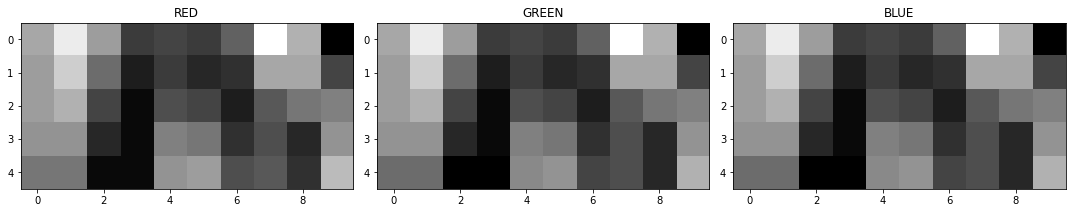

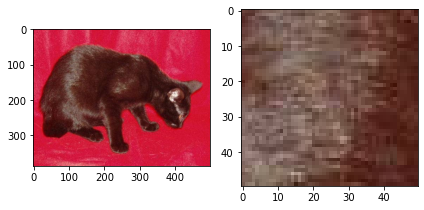

In [76]:
images_random = cv2.imread(img_path)
img_random_cvt = cv2.cvtColor(images_random,cv2.COLOR_BGR2RGB)
print(f' The whole image shape {img_random_cvt.shape}, \n[0] shape: {img_random_cvt[0].shape}')
print("\nFull image here:\n")
print(img_random_cvt)

print(f' \nTest_value_0 --- RED Channel:\n {img_random_cvt[0:5, 0:10, 0]}')
print(f' \nTest_value_1 --- GREEN Channel:\n {img_random_cvt[0:5, 0:10, 1]}')
print(f' \nTest_value_0 --- BLUE Channel:\n {img_random_cvt[0:5, 0:10, 2]}')

plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("RED")
plt.imshow(img_random_cvt[0:5, 0:10, 0], cmap = "gray")

plt.subplot(1, 3, 2)
plt.title("GREEN")
plt.imshow(img_random_cvt[0:5, 0:10, 1], cmap = "gray")

plt.subplot(1, 3, 3)
plt.title("BLUE")
plt.imshow(img_random_cvt[0:5, 0:10, 2], cmap = "gray")

plt.tight_layout()
plt.show()

plt.subplot(1,2,1)
plt.imshow(img_random_cvt)

plt.subplot(1,2,2)
plt.imshow(img_random_cvt[100:150, 100:150,:], cmap = "gray")
plt.tight_layout()
plt.show()

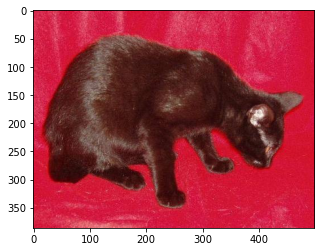

In [10]:
plt.imshow(img_random_cvt)
plt.show()

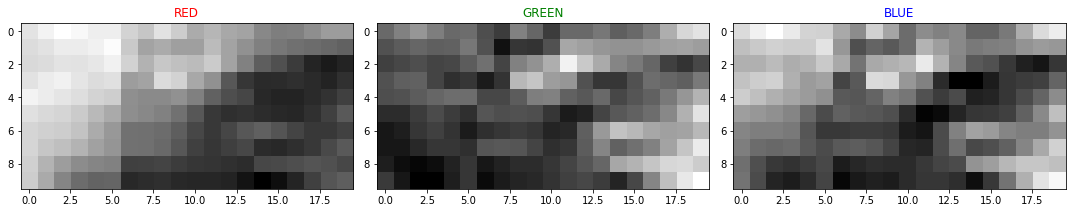

In [74]:
plt.figure(figsize = (15,15))

plt.subplot(1,3,1)
plt.title("RED", color = "Red")
plt.imshow(img_random_cvt[60:70, 90:110, 0], cmap = "gray")

plt.subplot(1,3,2)
plt.title("GREEN", color = "Green")
plt.imshow(img_random_cvt[60:70, 90:110, 1], cmap = "gray")

plt.subplot(1,3,3)
plt.title("BLUE", color = "Blue")
plt.imshow(img_random_cvt[60:70, 90:110, 2], cmap = "gray")

plt.tight_layout()
plt.show()

# print(f'IMAGE_RANDOM_CVT\n{img_random_cvt[60:70, 90:110, :]}')

Converting **BGR** to **GRAY**

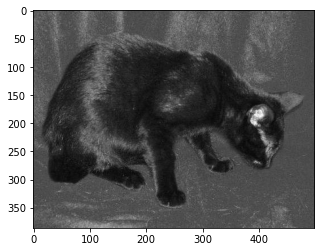

In [80]:
random_img_gray = cv2.cvtColor(images_random, cv2.COLOR_BGR2GRAY)
plt.imshow(random_img_gray, cmap = "gray")
plt.show()

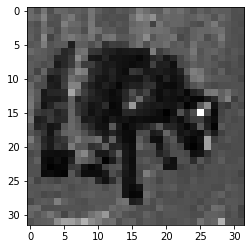

In [81]:
sample_img = cv2.resize(random_img_gray, (32, 32))
plt.imshow(sample_img, cmap = "gray")
plt.show()

Flattening the array to fetch the **individual pixel values**

In [84]:
pixel_vals = sample_img.flatten()
pixel_vals

array([102,  84, 111, ...,  85,  83,  81], dtype=uint8)

### We are going to repeat the same process to fetch all the data and their labels
___

We'll create a function for the same

In [189]:
def fetch_data_labels(base_path, img_path):
    
    train_imgs = []
    train_labels = []

    for i, fpath in enumerate(img_path):
        
        # Combining the base path and the img_path
        path = base_path + fpath
        
        # Reading the image
        img_read = cv2.imread(path)
        
        # Converting to grayscale
        img_read_gray = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
        
        # Scaling down the image
        img_scale = cv2.resize(img_read_gray, (32,32))
        label_id = class_obj.index(list(list(annotations['annotations'].values())[i][0].values())[0])
        label_val = list(list(annotations['annotations'].values())[i][0].values())[0]
        # Flatten the image
        pixel_vals = img_scale.flatten()
        
        # Appending the pixel values in train_imgs
        train_imgs.append(pixel_vals)
        
        # Appending the label ids in train_labels
        train_labels.append(label_id)
        
        # Processing status
        print(f' Image {i} processed | {label_val}')
    
    # Converting to numpy.ndarray for further processing
    train_imgs = np.array(train_imgs)
    train_labels = np.array(train_labels)
    print("The function has been successfully processed!")
    
    return train_imgs, train_labels

In [190]:
# print(list(annotations['annotations'].keys()))
class_obj = (annotations['labels'])
print(class_obj)

print(class_obj.index('cat'))

# For testing:
# for i in range(50):
#     # print(list(list(annotations['annotations'].values())[i][0].values()))
#     print(class_obj.index(list(list(annotations['annotations'].values())[i][0].values())[0]))

base_path = './images/'
fetch_img_path = list(annotations['annotations'].keys())

train_img, train_label = fetch_data_labels(base_path = base_path, img_path = fetch_img_path)

['dog', 'cat']
1
 Image 0 processed | cat
 Image 1 processed | dog
 Image 2 processed | dog
 Image 3 processed | dog
 Image 4 processed | cat
 Image 5 processed | dog
 Image 6 processed | cat
 Image 7 processed | cat
 Image 8 processed | cat
 Image 9 processed | cat
 Image 10 processed | cat
 Image 11 processed | cat
 Image 12 processed | cat
 Image 13 processed | dog
 Image 14 processed | dog
 Image 15 processed | cat
 Image 16 processed | cat
 Image 17 processed | cat
 Image 18 processed | dog
 Image 19 processed | dog
 Image 20 processed | cat
 Image 21 processed | dog
 Image 22 processed | dog
 Image 23 processed | cat
 Image 24 processed | cat
 Image 25 processed | cat
 Image 26 processed | dog
 Image 27 processed | cat
 Image 28 processed | cat
 Image 29 processed | dog
 Image 30 processed | dog
 Image 31 processed | cat
 Image 32 processed | dog
 Image 33 processed | cat
 Image 34 processed | cat
 Image 35 processed | dog
 Image 36 processed | cat
 Image 37 processed | dog
 Imag

### OpenCV ony identifies arrays of type **float32**.
Thereby, we can do the required conversion using **astype(float32)**

In [211]:
######################################################################################################
# As in the earlier we had converted them to numpy array, so we were able to use .astype() directly. #
######################################################################################################

print(type(train_img))
train_img_final = train_img.astype("float32")
print(type(train_img_final), type(train_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [212]:
print(train_label)

[1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0]


In [213]:
train_label = train_label.astype('int')
print(train_label)

[1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0]


In [214]:
print(f'Train Label\n-\nSize:\n{train_label.size}\n-\nShape:\n{train_label.shape}')
# train_label.reshape(train_label.shape, 1)

Train Label
-
Size:
200
-
Shape:
(200,)


In [215]:
train_label_final= train_label.reshape(train_label.size,1)
print(train_label_final)

[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]

In [219]:
# Split ratio
test_size = 0.2

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(train_img_final, train_label_final, test_size = test_size, random_state = 0)

In [235]:
print(f'Training has started!')
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

# Get different values for k
k_trees = [1, 2, 3, 4, 5]
k_result = []

for k in k_trees:
    ret, result, neighbours, dist = knn.findNearest(x_test, k = k) # Fetching the result using knn
    k_result.append(result) # Appending the fetched result in k_result
    
flattened = []

for k in k_result:
    flat_result = [item for sublist in k for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print(f'Training is completed in {end_datetime - start_datetime}')

Training has started!
Training is completed in 0:00:00.145525


We will be getting **different accuracy** value for each value of k

### Fetching **confusion** matrix

In [238]:
accuracy_res = []
confusion_mat = []

for k in k_result:
    label_name = [0, 1]
    cmtx = confusion_matrix(y_test, k, labels = label_name)
    confusion_mat.append(cmtx)

### Fetching **accuracy**

In [246]:
# print(confusion_mat)

for k in k_result:
    
    # Seeking values if found a proper match
    matches = k == y_test
    
    # Fetching the correct values which matches with the y_test or test labels value
    correct = np.count_nonzero(matches)
    
    # Calculating the accuracy
    calc_accuracy = correct*100 / result.size
    
    # Appending the values in accuracy_res
    accuracy_res.append(calc_accuracy)

print(accuracy_res)

[60.0, 55.0, 57.5, 60.0, 57.5]


In [281]:
# type(accuracy_res)
# type(k_result)
store_accuracy = {k_trees[i] : accuracy_res[i] for i in range(len(k_trees))}
print(store_accuracy)

{1: 60.0, 2: 55.0, 3: 57.5, 4: 60.0, 5: 57.5}


In [282]:
store_acc_sort = sorted(store_accuracy.items())
print(store_acc_sort)

[(1, 60.0), (2, 55.0), (3, 57.5), (4, 60.0), (5, 57.5)]


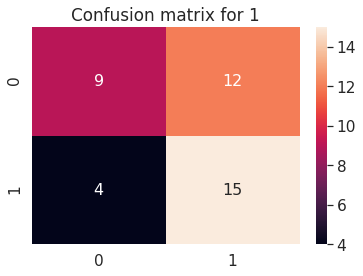

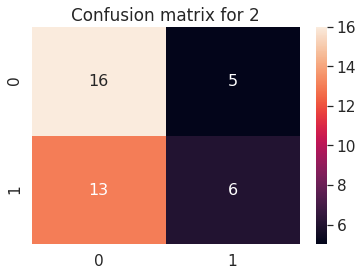

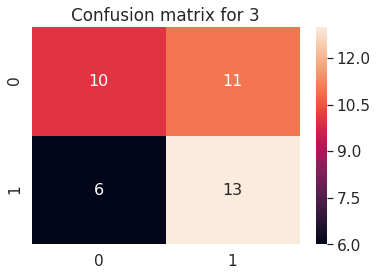

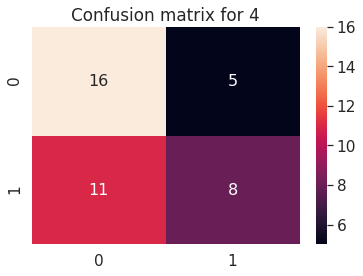

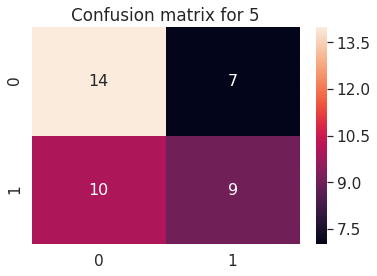

In [297]:
# print(confusion_mat)

t = 0

for cm in confusion_mat:
    
    # Converting to dataframe
    conf_mtx = pd.DataFrame(cm)
    
    # Setting the label size
    sns.set(font_scale = 1.4)
    
    # Setting up the heatmap, fmt for the fontsize
    ## sns.heatmap(the_confusion_matrix_here, annotation_true, annotation_size, font_size)
    sns.heatmap(conf_mtx, annot = True, annot_kws={"size": 16}, fmt = ".0f")
    
    t+=1
    plt.title("Confusion matrix for " + str(t))
    plt.show()